# Analysis using WGAN
### Author: Marlene Marchena

### Importing Libraries

In [1]:
#Import data manipulation libraries
import WGAN
import pandas as pd
import numpy as np
import time
import multiprocessing as mp

#Import visualization libraries
import matplotlib.pyplot as plt 

from sklearn.preprocessing import MinMaxScaler

# models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# over sampling functions
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import RandomOverSampler

# metrics
from sklearn.metrics import f1_score, recall_score, precision_score, auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

import tensorflow as tf
#set random seed and percentage of test data
random_seed = 12345678
np.random.seed(12345678)
tf.random.set_seed(12345678)

Loading the train and test data for the five folds

In [2]:
x_train1 = np.loadtxt('x_train1_outlierTreatment.csv', delimiter=',')
y_train1 = np.loadtxt('y_train1_outlierTreatment.csv', dtype='int32', delimiter=',')
y_train1 = y_train1.reshape(-1,1)
x_test1 = np.loadtxt('x_test_fold1.csv', delimiter=',')
y_test1 = np.loadtxt('y_test_fold1.csv', dtype='int32', delimiter=',')
y_test1 = y_test1.reshape(-1,1)

x_train2 = np.loadtxt('x_train2_outlierTreatment.csv', delimiter=',')
y_train2 = np.loadtxt('y_train2_outlierTreatment.csv', dtype='int32', delimiter=',')
y_train2 = y_train2.reshape(-1,1)
x_test2 = np.loadtxt('x_test_fold2.csv', delimiter=',')
y_test2 = np.loadtxt('y_test_fold2.csv', dtype='int32', delimiter=',') 
y_test2 = y_test2.reshape(-1,1)

x_train3 = np.loadtxt('x_train3_outlierTreatment.csv', delimiter=',')
y_train3 = np.loadtxt('y_train3_outlierTreatment.csv', dtype='int32', delimiter=',')
y_train3 = y_train3.reshape(-1,1)
x_test3 = np.loadtxt('x_test_fold3.csv', delimiter=',')
y_test3 = np.loadtxt('y_test_fold3.csv', dtype='int32', delimiter=',') 
y_test3 = y_test3.reshape(-1,1)

x_train4 = np.loadtxt('x_train4_outlierTreatment.csv', delimiter=',')
y_train4 = np.loadtxt('y_train4_outlierTreatment.csv', dtype='int32', delimiter=',')
y_train4 = y_train4.reshape(-1,1)
x_test4 = np.loadtxt('x_test_fold4.csv', delimiter=',')
y_test4 = np.loadtxt('y_test_fold4.csv', dtype='int32', delimiter=',') 
y_test4 = y_test4.reshape(-1,1)

x_train5 = np.loadtxt('x_train5_outlierTreatment.csv', delimiter=',')
y_train5 = np.loadtxt('y_train5_outlierTreatment.csv', dtype='int32', delimiter=',')
y_train5 = y_train5.reshape(-1,1)
x_test5 = np.loadtxt('x_test_fold5.csv', delimiter=',')
y_test5 = np.loadtxt('y_test_fold5.csv', dtype='int32', delimiter=',') 
y_test5 = y_test5.reshape(-1,1)

We are going to scale all the dataset between 0 and 1, this is done to facilitate the training process 

In [3]:
## define min max scaler
scaler = MinMaxScaler()

# scaling the data
x_train_f1_scaled = scaler.fit_transform(x_train1)  
x_train_f2_scaled = scaler.fit_transform(x_train2)  
x_train_f3_scaled = scaler.fit_transform(x_train3)  
x_train_f4_scaled = scaler.fit_transform(x_train4)  
x_train_f5_scaled = scaler.fit_transform(x_train5)  

## Wasserstein GAN

In [4]:
def train_wgan(x_train,y_train, epochs = 100, batch_size=64, name='name'):
    '''
    This functions train WGAN and save the h5 file and the 
    training losses image  
    '''   
    wgan = WGAN.WGAN()
    # spliting train and test into normal and fraud samples
    y_train_0, y_train_1 = y_train[y_train==0], y_train[y_train==1]
    x_train_0, x_train_1 = x_train[y_train_0], x_train[y_train_1]
    
    # training WGAN using only frauds samples
    wgan.train(dataset = x_train_1, epochs = epochs, batch_size=batch_size,name=name)

Here the GAN is trained and saved for each fold

In [ ]:
#train_wgan(x_train_f1_scaled,y_train1, 3000, 64, 'wgan_fold1')
#train_wgan(x_train_f2_scaled,y_train2, 3000, 64, 'wgan_fold2')
#train_wgan(x_train_f3_scaled,y_train3, 3000, 64, 'wgan_fold3')
#train_wgan(x_train_f4_scaled,y_train4, 3000, 64, 'wgan_fold4')
#train_wgan(x_train_f5_scaled,y_train5, 3000, 64, 'wgan_fold5')

>1, c1=-0.001, c2=0.002, g=-0.001
>1, c1=-0.001, c2=0.002, g=-0.001
>2, c1=-0.001, c2=0.002, g=-0.001
>1, c1=-0.001, c2=0.002, g=-0.001
>2, c1=-0.001, c2=0.002, g=-0.001
>1, c1=-0.001, c2=0.002, g=-0.001
>1, c1=-0.001, c2=0.002, g=-0.001
>3, c1=-0.001, c2=0.001, g=-0.001
>2, c1=-0.001, c2=0.001, g=-0.001
>3, c1=-0.001, c2=0.001, g=-0.001
>2, c1=-0.001, c2=0.002, g=-0.001
>2, c1=-0.001, c2=0.001, g=-0.001
>4, c1=-0.001, c2=0.001, g=-0.001
>3, c1=-0.001, c2=0.001, g=-0.001
>4, c1=-0.001, c2=0.001, g=-0.001
>3, c1=-0.001, c2=0.001, g=-0.001
>3, c1=-0.001, c2=0.001, g=-0.001
>4, c1=-0.001, c2=0.001, g=-0.001>5, c1=-0.001, c2=0.001, g=-0.001

>5, c1=-0.001, c2=0.001, g=-0.001
>4, c1=-0.001, c2=0.001, g=-0.001
>4, c1=-0.001, c2=0.001, g=-0.001
>5, c1=-0.001, c2=0.001, g=-0.001
>6, c1=-0.001, c2=0.001, g=-0.001
>6, c1=-0.001, c2=0.001, g=-0.001
>5, c1=-0.001, c2=0.001, g=-0.001
>5, c1=-0.001, c2=0.001, g=-0.001
>6, c1=-0.001, c2=0.001, g=-0.001
>7, c1=-0.001, c2=0.001, g=-0.001
>7, c1=-0.001,

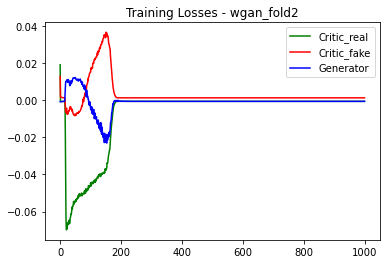

>998, c1=-0.001, c2=0.001, g=-0.001
>998, c1=-0.001, c2=0.001, g=-0.001
>999, c1=-0.001, c2=0.001, g=-0.001


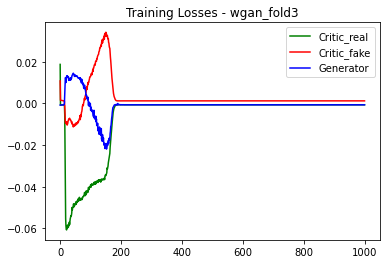

>999, c1=-0.001, c2=0.001, g=-0.001
>999, c1=-0.001, c2=0.001, g=-0.001
>1000, c1=-0.001, c2=0.001, g=-0.001
>1000, c1=-0.001, c2=0.001, g=-0.001
>1000, c1=-0.001, c2=0.001, g=-0.001


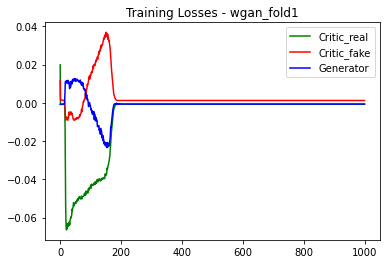

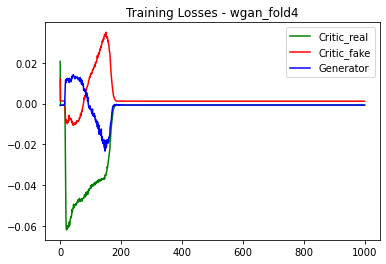

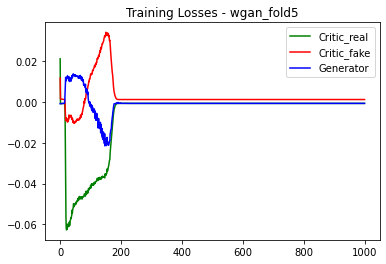

Time taken = 566.6110591888428 seconds


In [5]:
#Using multiprocessing to speed the WGAN training process
if __name__ == '__main__':
    
    start = time.time()
    
    values = ((x_train_f1_scaled,y_train1, 1000, 64, 'wgan_fold1'), 
          (x_train_f2_scaled,y_train2, 1000, 64, 'wgan_fold2'), 
          (x_train_f3_scaled,y_train3, 1000, 64, 'wgan_fold3'),
          (x_train_f4_scaled,y_train4, 1000, 64, 'wgan_fold4'),
          (x_train_f5_scaled,y_train5, 1000, 64, 'wgan_fold5')
         )  
    
    pool = mp.Pool()
    p = pool.starmap(train_wgan, values)
     
    end = time.time()   
    print('Time taken = {} seconds'.format(end - start))

In [6]:
def generate_balance_data_wgan(x_train, y_train, x_test, y_test, h5file='wgan.h5'):
    '''
    This function uses the GAN saved model in order to generate fraud samples.
    These samples are added to the training dataset to balance the data

    Returns a balanced dataset
    '''
    wgan = WGAN.WGAN()
        
    # spliting train and test into normal and fraud samples
    y_train_0, y_train_1 = y_train[y_train==0], y_train[y_train==1]
    x_train_0, x_train_1 = x_train[y_train_0], x_train[y_train_1]
    
    # calculate the samples needed in order to balance the training set
    n_samples = y_train_0.shape[0] - y_train_1.shape[0] 

    # Use the gan saved model in order to generate samples
    x_wgan_gen = wgan.generate_data(n_samples, name=h5file)     
    # Labels generation
    y_gen = np.ones((n_samples,1), dtype='int32')

    # Add the generated samples to the training GAN
    x_wgan = np.vstack((x_train,x_wgan_gen))
    y_wgan = np.vstack((y_train,y_gen))
    
    return x_wgan, y_wgan

For each fold we balance the data using WGANs

In [7]:
x_wgan_f1, y_wgan_f1 = generate_balance_data_wgan(x_train_f1_scaled,y_train1,x_test1,y_test1,h5file='wgan_fold1.h5')
x_wgan_f2, y_wgan_f2 = generate_balance_data_wgan(x_train_f2_scaled,y_train2,x_test2,y_test2,h5file='wgan_fold2.h5')
x_wgan_f3, y_wgan_f3 = generate_balance_data_wgan(x_train_f3_scaled,y_train3,x_test3,y_test3,h5file='wgan_fold3.h5')
x_wgan_f4, y_wgan_f4 = generate_balance_data_wgan(x_train_f4_scaled,y_train4,x_test4,y_test4,h5file='wgan_fold4.h5')
x_wgan_f5, y_wgan_f5 = generate_balance_data_wgan(x_train_f5_scaled,y_train5,x_test5,y_test5,h5file='wgan_fold5.h5')

In [8]:
# creating an external MinMaxScaler object for each fold to do the inverse 
# transformation of the data and recover original values
obj1 = scaler.fit(x_train1)
x_wgan_f1 = obj1.inverse_transform(x_wgan_f1)

obj2 = scaler.fit(x_train2)
x_wgan_f2 = obj2.inverse_transform(x_wgan_f2)

obj3 = scaler.fit(x_train3)
x_wgan_f3 = obj3.inverse_transform(x_wgan_f3)

obj4 = scaler.fit(x_train4)
x_wgan_f4 = obj4.inverse_transform(x_wgan_f4)

obj5 = scaler.fit(x_train5)
x_wgan_f5 = obj5.inverse_transform(x_wgan_f5)

In [9]:
def Evaluate_Top100(model,x_train,y_train,x_test,y_test):
    '''
    This fuction fits a model with the original data and evaluate it with the top 100 alerts
    model to be used
    Returns the confusion matrix and performance measures over the top 100 alerts
    '''   
    clf = model.fit(x_train,np.ravel(y_train))

    # Prediction on the test dataset
    predicted = clf.predict(x_test)
    pred_prob = clf.predict_proba(x_test) 
    #selecting only probabilities of frauds
    pred_prob1 = pred_prob[:,1]
    
    #Sorting in descending order by the probability of class 1  
    pred_prob_sorted_idx = np.argsort(-pred_prob1)
    pred_prob_sorted_idx = pred_prob_sorted_idx[:100]
        
    y_pred_top100 =predicted[pred_prob_sorted_idx]
    y_test_top100 = y_test[pred_prob_sorted_idx]
  
    f  = round(f1_score(y_test_top100,y_pred_top100),6)  # f1: 2 tp / (2 tp + fp + fn)
    recall  = round(recall_score(y_test_top100,y_pred_top100),6) # recall: tp / (tp + fn)
    pre  = round(precision_score(y_test_top100,y_pred_top100),6) # precision: tp / (tp + fp)
    p, r, _ = precision_recall_curve(y_test_top100,y_pred_top100)

    auprc = round(auc(r, p),6) if not np.isnan(auc(r, p)) else None


    tn, fp, fn, tp = confusion_matrix(y_test_top100,y_pred_top100).ravel()

    results = {'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp,'precision': pre, 'recall': recall, 
               'f1_score': f, 'auprc': auprc }

    return results

In [10]:
#Using multiprocessing to speed the running time
if __name__ == '__main__':
    
    start = time.time()
    
    # Setting the models to be used
#     knn = KNeighborsClassifier(n_neighbors=3)
#     rf = RandomForestClassifier(max_depth=3, random_state=random_seed)
    xgb = XGBClassifier(random_state=random_seed)   
    
    values = ((xgb , x_wgan_f1, y_wgan_f1, x_test1, y_test1), 
              (xgb , x_wgan_f2, y_wgan_f2, x_test2, y_test2), 
              (xgb , x_wgan_f3, y_wgan_f3, x_test3, y_test3),   
              (xgb , x_wgan_f4, y_wgan_f4, x_test4, y_test4),   
              (xgb , x_wgan_f5, y_wgan_f5, x_test3, y_test3)  
             )   
    pool = mp.Pool()
    p = pool.starmap(Evaluate_Top100, values)
    print(p) 
    df = pd.DataFrame(p, index =['fold 1', 'fold 2', 'fold 3', 'fold 4', 'fold 5'])
    print(df)
    xgb_df_mean = df.iloc[:,4:].mean()
    print(xgb_df_mean)
    end = time.time()
    total = round(end - start,1)
    print('Time taken = {} minutes'.format(total/60))

[{'tn': 7, 'fp': 8, 'fn': 4, 'tp': 81, 'precision': 0.910112, 'recall': 0.952941, 'f1_score': 0.931034, 'auprc': 0.951527}, {'tn': 14, 'fp': 8, 'fn': 5, 'tp': 73, 'precision': 0.901235, 'recall': 0.935897, 'f1_score': 0.918239, 'auprc': 0.943566}, {'tn': 15, 'fp': 10, 'fn': 3, 'tp': 72, 'precision': 0.878049, 'recall': 0.96, 'f1_score': 0.917197, 'auprc': 0.934024}, {'tn': 17, 'fp': 7, 'fn': 4, 'tp': 72, 'precision': 0.911392, 'recall': 0.947368, 'f1_score': 0.929032, 'auprc': 0.94938}, {'tn': 5, 'fp': 1, 'fn': 0, 'tp': 94, 'precision': 0.989474, 'recall': 1.0, 'f1_score': 0.994709, 'auprc': 0.994737}]
        tn  fp  fn  tp  precision    recall  f1_score     auprc
fold 1   7   8   4  81   0.910112  0.952941  0.931034  0.951527
fold 2  14   8   5  73   0.901235  0.935897  0.918239  0.943566
fold 3  15  10   3  72   0.878049  0.960000  0.917197  0.934024
fold 4  17   7   4  72   0.911392  0.947368  0.929032  0.949380
fold 5   5   1   0  94   0.989474  1.000000  0.994709  0.994737
precis

In [ ]:
def Evaluate_Top100(model,x_train,y_train,x_test,y_test):
    '''
    model to be used
    Returns the confusion matrix and performance measures over the top 100 alerts
    '''
    clf = model.fit(x_train,np.ravel(y_train))

    predicted = clf.predict(x_test)
    pred_prob = clf.predict_proba(x_test) 
    #selecting only probabilities of frauds, i.e, 1
    pred_prob1 = pred_prob[:,1]
    #Sorting in descending order by the probability of class 1  
    pred_prob_sorted_idx = np.argsort(-pred_prob1)
    pred_prob_sorted_idx = pred_prob_sorted_idx[:100]
    y_pred_top100 =predicted[pred_prob_sorted_idx]
    y_test_top100 = y_test[pred_prob_sorted_idx] 
   
    f  = round(f1_score(y_test_top100,y_pred_top100),6)  # f1: 2 tp / (2 tp + fp + fn)
    recall  = round(recall_score(y_test_top100,y_pred_top100),6) # recall: tp / (tp + fn)
    pre  = round(precision_score(y_test_top100,y_pred_top100),6) # precision: tp / (tp + fp)
    p, r, _ = precision_recall_curve(y_test_top100,y_pred_top100)

    auprc = round(auc(r, p),6) if not np.isnan(auc(r, p)) else None
    
    tn, fp, fn, tp = confusion_matrix(y_test_top100,y_pred_top100).ravel()

    results = {'tn': tn, 'fp': fp, 'fn': fn, 'tp': tp,'precision': pre, 'recall': recall, 
               'f1_score': f, 'auprc': auprc }

    return results

In [ ]:
#Using multiprocessing to speed the running time
if __name__ == '__main__':
    
    start = time.time()
    
    # Setting the models to be used
    knn = KNeighborsClassifier(n_neighbors=3)
    rf = RandomForestClassifier(max_depth=3, random_state=12)
    xgb = XGBClassifier()   

    #We use here the balanced data generated using WGAN
    values = ((knn , x_wgan_f3, y_wgan_f3, x_test3, y_test3),   # knn
      (rf , x_wgan_f3, y_wgan_f3, x_test3, y_test3),    # Random Forest
      (xgb , x_wgan_f3, y_wgan_f3, x_test3, y_test3)    # xgboost
     )      
    pool = mp.Pool()
    p = pool.starmap(Evaluate_Top100, values)
    print(p) 
    df = pd.DataFrame(p, index =['knn', 'rf', 'xgb'])
    print(df) 
     
    end = time.time()
    total = round(end - start,1)
    print('Time taken = {} minutes'.format(total/60))

In [ ]:
wdf1 = df

In [ ]:
fold 1
     tn   fp  fn  tp  precision  recall  f1_score  auprc
knn   0   84   0  16       0.16     1.0  0.275862  0.580
rf    0  100   0   0       0.00     0.0  0.000000    NaN
xgb   0   99   0   1       0.01     1.0  0.019802  0.505
Time taken = 9.013333333333332 minutes


fold 
fold 3
     tn   fp  fn  tp  precision  recall  f1_score  auprc
knn   0  100   0   0       0.00     0.0  0.000000    NaN
rf    0   93   0   7       0.07     1.0  0.130841  0.535
xgb   0  100   0   0       0.00     0.0  0.000000    NaN
Time taken = 10.491666666666667 minutes

fold

fold 5
tn   fp  fn  tp  precision    recall  f1_score     auprc
knn  19    4   2  75   0.949367  0.974026  0.961538  0.971697
rf    0  100   0   0   0.000000  0.000000  0.000000       NaN
xgb   7   11   1  81   0.880435  0.987805  0.931034  0.939120
Time taken = 11.023333333333333 minutes

In [ ]:
#wdf3 = df
# concatenate them
wdf_concat = pd.concat((wdf1, wdf2,wdf3, wdf4, wdf5))
by_row_index = wdf_concat.groupby(wdf_concat.index)
wdf_means = by_row_index.mean()
wdf_means